<a href="https://colab.research.google.com/github/prashantiyaramareddy/MyPython-Stuff/blob/master/Pytorch/Pytorch_ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Computer vision

## 0. Computer Vision libraries for Pytorch

* [' torchvision'] - base domain library for Pytorch computer Vision
* ' torchvision.datasets' - get datasets and data loading functions for computer vision for your own problems
* 'torchvision.transforms' - functions for manipulating your vision data (images) to be suitable for use with ML model
* ' torch.utils.data.DataLoader'- Creates a Python iterable over a dataset
* ' torch.utils.data.Dataset' - Base dataset class for Pytorch

In [1]:
# Import Pytorch
import torch
from torch import nn

# Import torch vision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.8.0+cu126
0.23.0+cu126


# Getting datasets
The dataset we will be using is Fashion MNIST

In [2]:
from torchvision import datasets

train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None,
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None,
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.8MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 203kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.81MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 36.7MB/s]


In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
image.shape, label


(torch.Size([1, 28, 28]), 9)

## 1.2 Visualizing our data

Label: 9, Class: Ankle boot


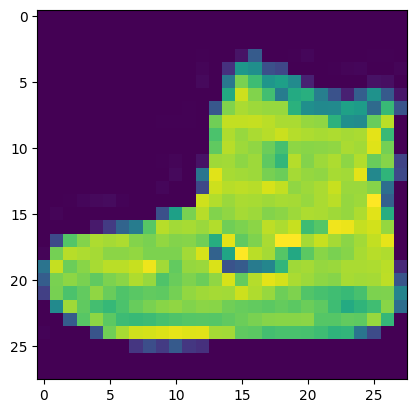

In [9]:
import matplotlib.pyplot as plt
plt.imshow(image.squeeze())
print(f'Label: {label}, Class: {class_names[label]}')

Label: 9, Class: Ankle boot


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

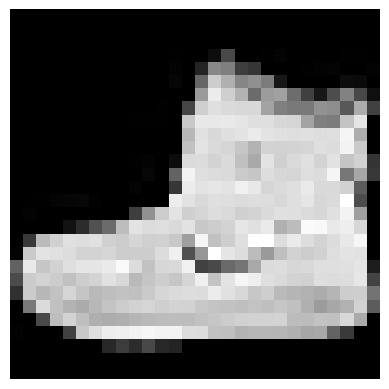

In [10]:
plt.imshow(image.squeeze(), cmap='gray')
print(f'Label: {label}, Class: {class_names[label]}')
plt.axis('off')

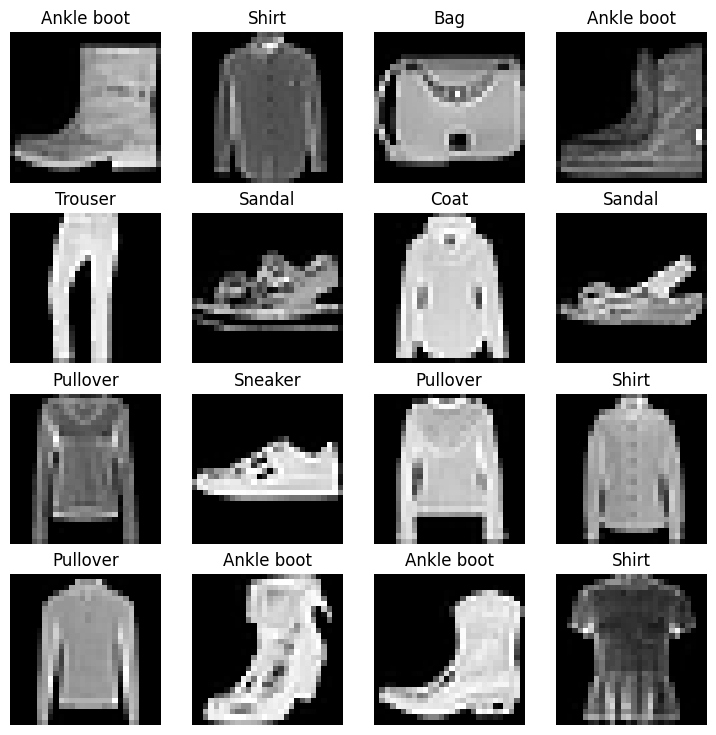

In [11]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.axis('off')
    plt.title(class_names[label])


Do you thnk the items of clothing could be modelled with pure linear lined

In [12]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader

Right now, our data is in the form of Pytorch Datasets

DataLoader,turns our data into batches ( or mini batches)

More specfically, we want to turn our data into batches

Why would you do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one bit. So we break it down to 32 images at a time ( batch size of 32)
2. It gives our neural network more chances to update its gradients per epoch

In [13]:
# Turn data set into Data loader
from torch.utils.data import DataLoader

# Setup batch size hyperparameter
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7d3be043b260>,
 <torch.utils.data.dataloader.DataLoader at 0x7d3be0336000>)

In [14]:
# Let's check out what we have created
print(f'Dataloader: {train_dataloader}\nLength: {len(train_dataloader)}\nType: {type(train_dataloader)}')
print(f'Dataloader: {test_dataloader}\nLength: {len(test_dataloader)}\nType: {type(test_dataloader)}')

Dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7d3be043b260>
Length: 1875
Type: <class 'torch.utils.data.dataloader.DataLoader'>
Dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7d3be0336000>
Length: 313
Type: <class 'torch.utils.data.dataloader.DataLoader'>


In [15]:
# Check out what's inside train batch loader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
print(f'Image shape: {train_features_batch.shape}\nLabel shape: {train_labels_batch.shape}')

Image shape: torch.Size([32, 1, 28, 28])
Label shape: torch.Size([32])


Label: 8, Class: Bag
image shape: torch.Size([1, 28, 28])


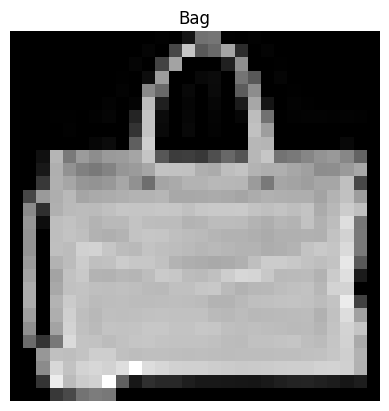

In [16]:
# Show a sample
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()

random_image = train_features_batch[random_idx]
random_label = train_labels_batch[random_idx]

plt.imshow(random_image.squeeze(), cmap='gray')
plt.axis('off')
plt.title(class_names[random_label])
print(f'Label: {random_label}, Class: {class_names[random_label]}')
print(f'image shape: {random_image.shape}')


## 3. Model 0 : Build a baseline model

A baseline model is a simple model you try and improve upon with subsequent models/experiments.

In other words: start simply and complexity when necessary



In [17]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

# Print out what happened
print(f'Shape before flattening: {x.shape}\nShape after flattening: {output.shape}')
#

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [18]:
x.squeeze()

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078, 0.0000, 0.0000, 0.0039,
         0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [19]:
from torch import nn
class FasionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [20]:
torch.manual_seed(42)

# Set up the model with input parameters

model_0 = FasionMNISTModelV0(
    input_shape= 784,
    hidden_units= 10,
    output_shape= len(class_names)
)

model_0

FasionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

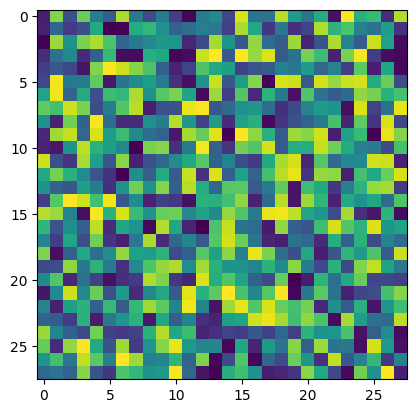

In [22]:
plt.imshow(dummy_x.squeeze())

In [23]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [24]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

# Set up loss, optimizer and evaluation metrics

* Loss Function - nn.CrossEntropyLoss - since working with multi-class data
* Optimizer - 'torch.optim.SGD' - Stochastic Gradient Descent
* Metrics - 'torchmetrics.Accuracy' - Accuracy

In [25]:
import requests
from pathlib import Path

# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

if Path('helper_functions.py').is_file():
  print('helper_functions.py already exists')
  print('Skipping download')
  pass
else:
  print('Downloading helper_functions.py')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)
    print('helper_functions.py downloaded')


# Import accuracy metric

from helper_functions import accuracy_fn

# Set up loss
loss_fn = nn.CrossEntropyLoss()

# Set up optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                              lr=0.01)


helper_functions.py downloaded


## 3.2 Creating a function to time our experiments

* Machine learning is very experimental

* Two of the main things you will often want to track are:
  1. Models Performance ( loss and accuracy values etc)
  2. How fast it runs



In [26]:
from timeit import default_timer as timer
from tqdm.auto import tqdm

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  total_time = end - start
  print(f'Train time on {device}: {total_time:.3f} seconds')
  return total_time

start_time = timer()

# some _code

end_time = timer()
print_train_time(start_time, end_time, device)

Train time on cpu: 0.000 seconds


2.3260000006075643e-05

## 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. Print out what happened
5. time it all

In [27]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs ( keep them small for faster training time)

epochs = 4

# Send model to the target device
model_0.to(device)

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")

  ## Training
  train_loss = 0

  for batch, (X, y) in enumerate(train_dataloader):
# Training Model
    model_0.train()
    X, y = X.to(device), y.to(device)
    y_pred = model_0(X)

    # Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # Optimizer zero grad
    optimizer.zero_grad()

    # loss backward
    loss.backward()

    # Optimizer step
    optimizer.step()

    if batch % 400 == 0:
      print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples')

  train_loss /= len(train_dataloader)
  print(f'Train Loss: {train_loss:.5f}')

  model_0.eval()
  with torch.inference_mode():
    test_loss = 0
    for X_test, y_test in test_dataloader:
      X_test, y_test = X_test.to(device), y_test.to(device)
      test_pred = model_0(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_loss /= len(test_dataloader)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred.argmax(dim=1))
    print(f'Test Loss: {test_loss:.5f}')
    print(f'Test Acc: {test_acc:.5f}')

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(device))

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 0.90961
Test Loss: 0.00120
Test Acc: 87.50000
Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 0.55733
Test Loss: 0.00103
Test Acc: 87.50000
Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 0.50266
Test Loss: 0.00096
Test Acc: 87.50000
Epoch: 3
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 0.47653
Test Loss: 0.00093
Test Acc: 87.50000
Train time on cpu: 33.216 seconds


## 4. Make Predictions and get Model_0 results

In [28]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device:torch.device = device):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name":model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc":acc}

# Calculate the model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results


{'model_name': 'FasionMNISTModelV0',
 'model_loss': 0.4944238066673279,
 'model_acc': 82.78753993610223}

In [29]:
## 5. Model 1: Building a better model with Non linearlity

class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units_1: int,
               hidden_units_2: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units_1),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units_1,
                  out_features=hidden_units_2),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units_2,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units_1= 10,
                              hidden_units_2=10,
                              output_shape=len(class_names))
model_1.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[-0.0084,  0.0328, -0.0078,  ...,  0.0135, -0.0188, -0.0354],
                      [ 0.0187,  0.0085, -0.0182,  ...,  0.0115, -0.0008,  0.0017],
                      [ 0.0045,  0.0133, -0.0108,  ...,  0.0059,  0.0100,  0.0273],
                      ...,
                      [-0.0344,  0.0127, -0.0325,  ..., -0.0011, -0.0230,  0.0257],
                      [ 0.0291,  0.0243, -0.0006,  ...,  0.0001,  0.0176, -0.0147],
                      [ 0.0053, -0.0194, -0.0170,  ...,  0.0205, -0.0093,  0.0283]])),
             ('layer_stack.1.bias',
              tensor([-0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,  0.0018,  0.0163,
                       0.0069, -0.0078])),
             ('layer_stack.3.weight',
              tensor([[ 0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,  0.2019,  0.2847,
                       -0.1495,  0.1344],
                      [-0.0740,  0.2006, -0.0475, -0.2514, -0.3130, -0.0118,  0.

In [30]:
epochs = 10

for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n-------')

  train_loss = 0
  model_1.train()
  # Send model to the target device
  model_1.to(device)
  for batch, (X_train, y_train) in enumerate(train_dataloader):
    X_train, y_train = X_train.to(device), y_train.to(device)
    y_pred = model_1(X_train)
    loss = loss_fn(y_pred, y_train)
    train_loss += loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 400 == 0:
      print(f'Looked at {batch * len(X_train)}/{len(train_dataloader.dataset)} samples')

  train_loss /= len(train_dataloader)
  print(f'Train Loss: {train_loss:.5f}')

  model_1.eval()
  with torch.inference_mode():
    test_loss = 0
    test_acc = 0
    for X_test, y_test in test_dataloader:
      X_test, y_test = X_test.to(device), y_test.to(device)
      test_pred = model_1(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test,
                             y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    print(f'Test Loss: {test_loss:.5f}')
    print(f'Test Acc: {test_acc:.5f}')

model_1_results = {
    'model_name': model_1.__class__.__name__,
    'model_loss': test_loss.item(),
    'model_acc': test_acc
}

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 2.32577
Test Loss: 2.32558
Test Acc: 9.91414
Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 2.32577
Test Loss: 2.32558
Test Acc: 9.91414
Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 2.32577
Test Loss: 2.32558
Test Acc: 9.91414
Epoch: 3
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 2.32577
Test Loss: 2.32558
Test Acc: 9.91414
Epoch: 4
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/6

In [31]:
def train_step(model:torch.nn.Module,
                data_loader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                optimizer: torch.optim.Optimizer,
                accuracy_fn,
                device: torch.device = device):
  train_loss, train_acc = 0, 0
  model.train()
  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # 6. Train Accuracy
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  return {'train_loss': train_loss,
          'train_acc': train_acc}

def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  test_loss, test_acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      # Put data on target device
      X, y = X.to(device), y.to(device)
      test_pred = model(X)
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    return {'test_loss': test_loss.item(),
          'test_acc': test_acc}

In [32]:
torch.manual_seed(42)

# Measure Time
from timeit import default_timer as timer
train_time_start_on_cpu = timer()

# Import accuracy metric
from helper_functions import accuracy_fn

# Set up loss
loss_fn = nn.CrossEntropyLoss()

# Set up optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                              lr=0.01)

# Set epochs
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()

# Send model to the target device
model_1.to(device)

for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n-------')
  train_metrics = train_step(model=model_1,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)

  test_metrics = test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

  print(f'Train Loss: {train_metrics["train_loss"]:.5f}')
  print(f'Train Acc: {train_metrics["train_acc"]:.5f}')
  print(f'Test Loss: {test_metrics["test_loss"]:.5f}')
  print(f'Test Acc: {test_metrics["test_acc"]:.5f}')


train_time_end_on_cpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(device))

model_1_results = {
    'model_name': model_1.__class__.__name__,
    'model_loss': test_metrics["test_loss"],
    'model_acc': test_metrics["test_acc"]
}

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train Loss: 1.16184
Train Acc: 58.33167
Test Loss: 0.72911
Test Acc: 73.95168
Epoch: 1
-------
Train Loss: 0.63740
Train Acc: 77.24333
Test Loss: 0.60371
Test Acc: 78.44449
Epoch: 2
-------
Train Loss: 0.55913
Train Acc: 80.23000
Test Loss: 0.55746
Test Acc: 79.81230
Train time on cpu: 24.280 seconds


In [33]:
total_train_time_model_0

33.21577637200001

In [34]:
total_train_time_model_1


24.280235945000015

Model -2

In [35]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### 7.1 Stepping through nn.conv2d

In [36]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]
test_image.shape

print(f'Shape of the test image: {test_image.shape}')
print(f'Shape of the test image batch: {images.shape}')
print(f'Number of color channels: {test_image.shape[0]}')


Shape of the test image: torch.Size([3, 64, 64])
Shape of the test image batch: torch.Size([32, 3, 64, 64])
Number of color channels: 3


In [37]:
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)
conv_layer.state_dict()


OrderedDict([('weight',
              tensor([[[[-0.0980, -0.0932, -0.0657],
                        [ 0.0543,  0.0279, -0.0050],
                        [-0.1058,  0.0739,  0.1665]],
              
                       [[-0.1828, -0.0083,  0.0375],
                        [-0.1812, -0.0576, -0.0810],
                        [-0.1214, -0.1053,  0.0157]],
              
                       [[ 0.0242,  0.1696,  0.0621],
                        [-0.0382, -0.1491, -0.1747],
                        [ 0.1375, -0.0280, -0.1159]]],
              
              
                      [[[-0.0600, -0.1148,  0.1637],
                        [-0.1369,  0.0516,  0.0649],
                        [-0.0878,  0.1724,  0.0266]],
              
                       [[ 0.0372, -0.1917,  0.0656],
                        [-0.1913, -0.0182,  0.1658],
                        [ 0.0254,  0.0197,  0.1340]],
              
                       [[-0.1544, -0.0901, -0.1373],
                        [-0.0800

In [38]:
torch.manual_seed(42)
# Pass the data through the convolutional layer
conv_output = conv_layer(test_image.unsqueeze(dim=0))
conv_output.shape

torch.Size([1, 10, 62, 62])

### 7.2 Stepping through nn.MaxPool2d()


In [39]:
test_image.shape

torch.Size([3, 64, 64])

In [40]:
# Print out original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image unsqueezed shape: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=4)
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Test image through conv layer shape: {test_image_through_conv.shape}")
# Pass the test image through the max pooling layer
test_image_through_conv_and_pool = max_pool_layer(test_image_through_conv)
print(f"Test image through conv and pool shape: {test_image_through_conv_and_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image unsqueezed shape: torch.Size([1, 3, 64, 64])
Test image through conv layer shape: torch.Size([1, 10, 62, 62])
Test image through conv and pool shape: torch.Size([1, 10, 15, 15])


In [41]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"Random tensor: \n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")
print(f"Max pool tensor: \n{max_pool_tensor}")

Random tensor: 
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])
Max pool tensor: 
tensor([[[[0.3367]]]])


7.3 Setup a loss function and optimizer for model_2

In [42]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                             lr=0.1)

7.4 Training and testing model_2 using our training and test functions

In [43]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Epoch: 1
---------
Epoch: 2
---------
Train time on cpu: 104.762 seconds


In [44]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3212365508079529,
 'model_acc': 88.01916932907348}

In [45]:
model_0_results


{'model_name': 'FasionMNISTModelV0',
 'model_loss': 0.4944238066673279,
 'model_acc': 82.78753993610223}

### 8. Compare model results and training time

In [46]:
import pandas as pd
compare_results = pd.DataFrame(data=[model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FasionMNISTModelV0,0.494424,82.787540
1,FashionMNISTModelV1,0.557457,79.812300
2,FashionMNISTModelV2,0.321237,88.019169


In [47]:
# Add training time to result comparision
compare_results['training_time'] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FasionMNISTModelV0,0.494424,82.787540,33.215776
1,FashionMNISTModelV1,0.557457,79.812300,24.280236
2,FashionMNISTModelV2,0.321237,88.019169,104.761876


In [48]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=compare_results)

KeyboardInterrupt: 

<Axes: xlabel='model_name', ylabel='model_loss'>

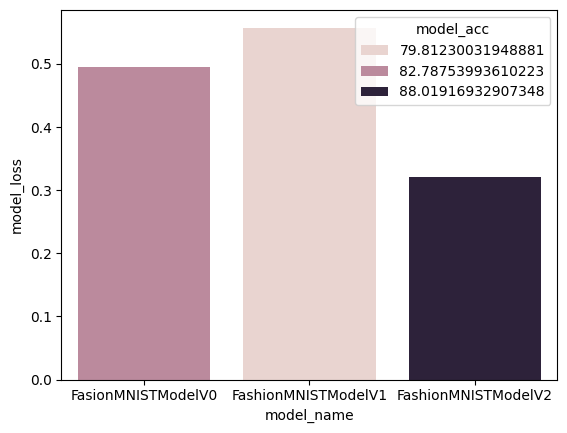

In [49]:
# Visualize our model results
import seaborn as sns
sns.barplot(data=compare_results,
            x='model_name',
            y='model_loss',
            hue='model_acc')

In [50]:
## 9. Make and evaluate random predictions with best model
def make_predictions(model:torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample ( add a batch dimension and pass to target device)
      sample = sample.unsqueeze(dim=0).to(device)

      # Make a prediction with the target model
      pred_logit = model(sample)

      # Get prediction probability ( logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn the list into tensor
  return torch.stack(pred_probs)




In [51]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [52]:
import random
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=10):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Prediction: Trouser')

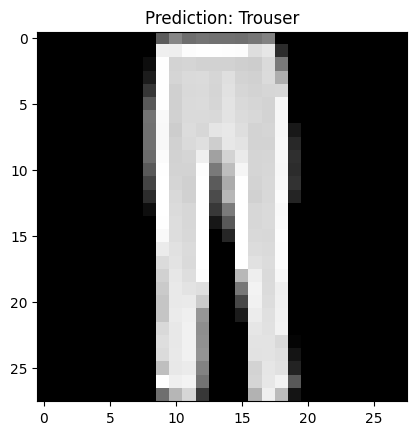

In [53]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(f'Prediction: {class_names[test_labels[0]]}')

In [54]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
pred_probs[:2]

tensor([[4.8374e-06, 9.9981e-01, 2.1147e-08, 1.3683e-04, 4.7978e-05, 1.7310e-08,
         5.0663e-07, 1.7135e-07, 4.9364e-07, 5.6685e-09],
        [8.4823e-07, 3.3091e-07, 2.1902e-06, 5.8322e-04, 3.4716e-06, 9.9904e-01,
         2.0592e-06, 1.9893e-04, 1.6472e-04, 2.7950e-06]])

In [55]:
# Convert pred probs to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([1, 5, 4, 7, 2, 7, 3, 2, 3, 3])

In [56]:
test_labels

[1, 5, 4, 7, 6, 7, 3, 2, 3, 3]

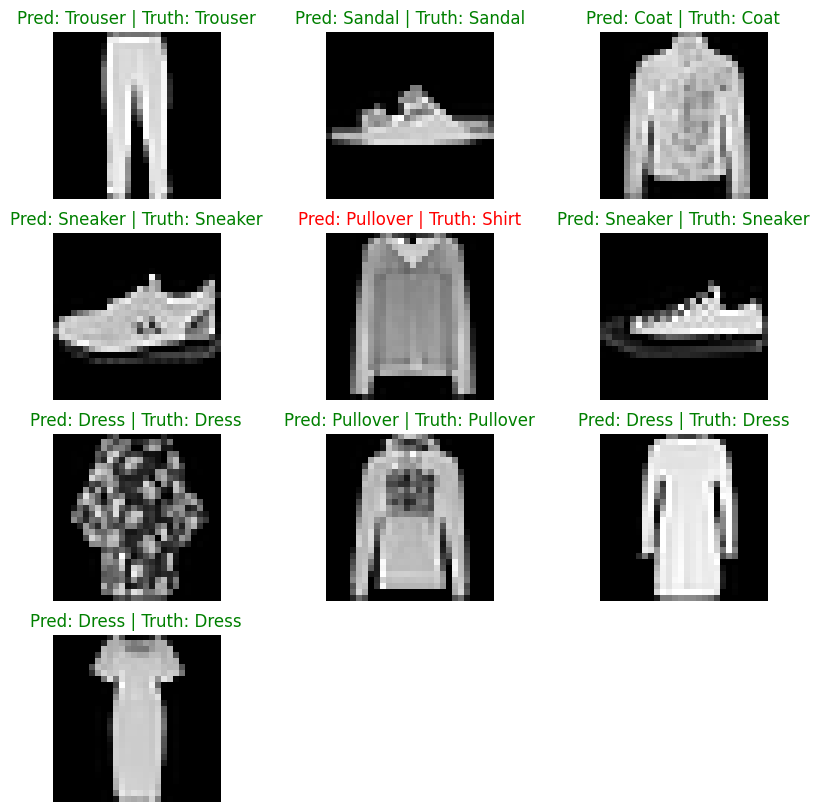

In [57]:
# Plot predictions
plt.figure(figsize=(10, 10))
nrows = 4

ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap='gray')

  # Find the prediction label in text form, e.g. sandal
  pred_label = class_names[pred_classes[i]]

  # Get the truth label
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot and color it green if the prediction is correct, red otherwise
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check if the prediction is correct
  if pred_label == truth_label:
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"
    plt.title(title_text, color='green')
  else:
    plt.title(title_text, color="red")
  plt.axis('off')

A confusion matrix is a fantastic way for evaluating classification models visually.

1. Make predictions with our trained model on the test dataset.
2. Make a confusion matrix torchmetrics.ConfusionMatrix.
3. Plot the confusion matrix using mlxtend.plotting .plot_confusion matrix

In [58]:
!pip install torchmetrics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 27.7 MB/s eta 0:00:00


Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

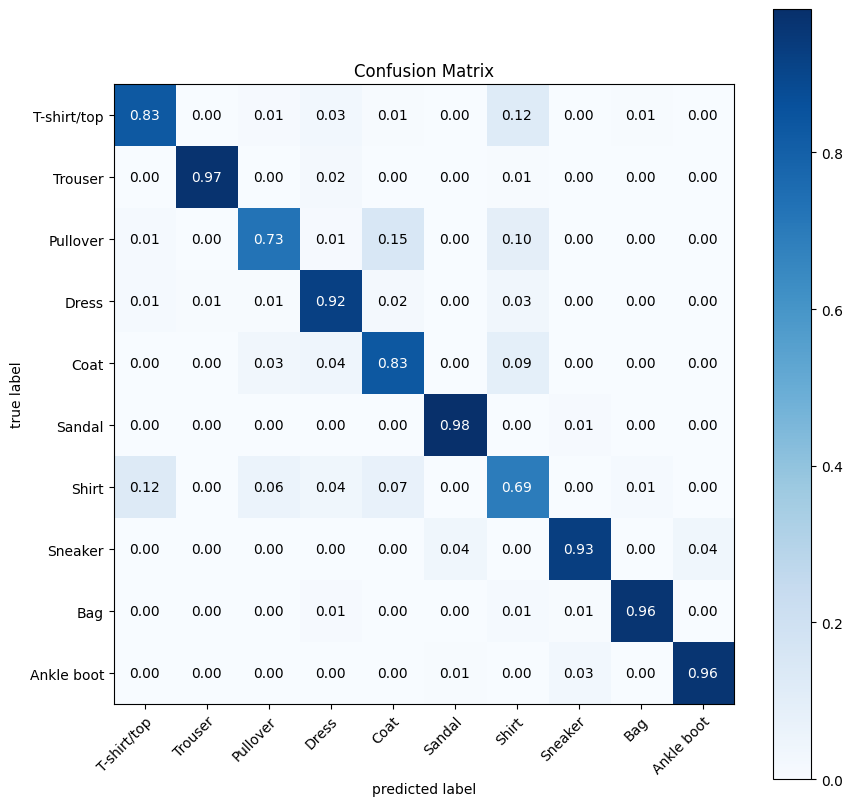

In [59]:
## 10. Making a confusion matrix for further metrics
from tqdm.auto import tqdm
import torchmetrics
from torchmetrics.classification import ConfusionMatrix # Import ConfusionMatrixDisplay
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import torch

# 1. Make predictions with trained model
y_preds = []
y_true_all = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc = "Making predictions"):
    X, y = X.to(device), y.to(device)
    # Make predictions
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities-> prediction labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    y_preds.append(y_pred.cpu())
    y_true_all.append(y.cpu())

# Concatenate list of predictions and true labels into tensors
y_preds_tensor = torch.cat(y_preds)
y_true_tensor = torch.cat(y_true_all)

# Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(task='multiclass', num_classes=len(class_names))
confmat_tensor = confmat(preds=y_preds_tensor,
                         target=y_true_tensor)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                                class_names=class_names,
                                figsize=(10, 10))
plt.title('Confusion Matrix')
plt.show()

In [63]:
## 11. Save and reload the trained model
from pathlib import Path

# Create model directory path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Save the model state dict
MODEL_NAME = '05_pytorch_computer_vision_model.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to: models/05_pytorch_computer_vision_model.pth


In [64]:
# Create a new instance
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

In [65]:
loaded_model_2.state_dict()

OrderedDict([('block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
           

In [66]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3212365508079529,
 'model_acc': 88.01916932907348}

In [68]:
torch.manual_seed(42)
loaded_model_2.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_2_results = eval_model(model=loaded_model_2,
                                    data_loader = test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn = accuracy_fn)
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3212365508079529,
 'model_acc': 88.01916932907348}

In [70]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results['model_acc']),
              torch.tensor(loaded_model_2_results['model_acc']),
              atol=0.001)

tensor(True)